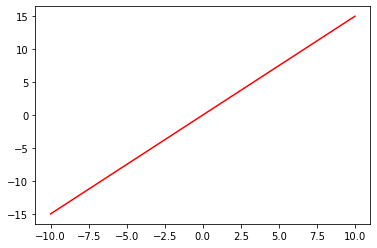

In [7]:
#Nos permite la clasificacion binaria partiendo de una variable cuantitativa
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
x = np.linspace(-10,10)
y = 0 + 1.5*x
plt.plot(x,y,'r')
plt.show()




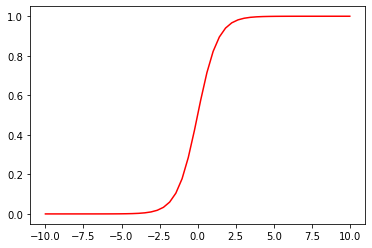

In [8]:
#Se basa en la funcion simoidea
def function(data):
    return 1/(1 + math.e**(-1.5*data))

              
y1 = function(x)
plt.plot(x,y1,'r')
plt.show()

In [9]:
#existe la regresion logistica polinomial la cual clasifica en mas de dos clases
#vamos aplicar la regrestion logistica en un ejemplo con datos reales
#https://www.kaggle.com/c/titanic

In [11]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#vamos a predicir si un pasajero sobrevive o no 
#primero hacemos un analisis de datos 

In [13]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [14]:
df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

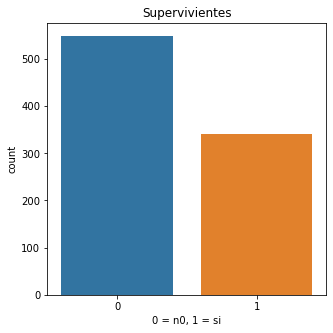

In [16]:
#nos dice que el 38% sobrevivieron mean = 0.38

f, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Survived', data = df)
plt.title('Supervivientes')
plt.xlabel('0 = n0, 1 = si')
plt.show()

In [20]:
supervivientes = np.sum(df.Survived)
print('Sobrevivieron:',supervivientes)

Sobrevivieron: 342


In [21]:
noSupervivientes = df.shape[0] - np.sum(df.Survived)
print('No sobrevivieron:',noSupervivientes)

No sobrevivieron: 549


In [22]:
supervivientes/df.shape[0]

0.3838383838383838

In [23]:
noSupervivientes/df.shape[0]

0.6161616161616161

In [30]:
correlation_titanic = df.corr().round(2)
correlation_titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


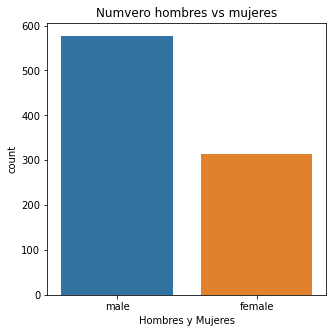

In [32]:
f, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Sex', data = df)
plt.title('Numvero hombres vs mujeres')
plt.xlabel('Hombres y Mujeres')
plt.show()

In [33]:
df[df['Sex'].str.match('female')].Sex.count()

314

In [34]:
df[df['Sex'].str.match('male')].Sex.count()

577

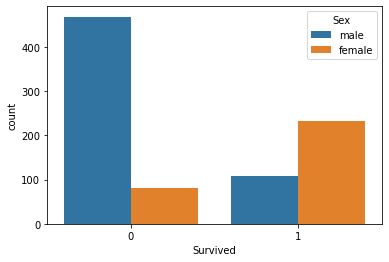

In [35]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

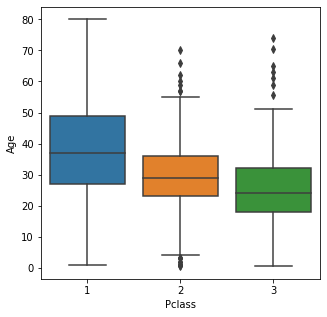

In [24]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Pclass', y='Age', data = df)
plt.show()

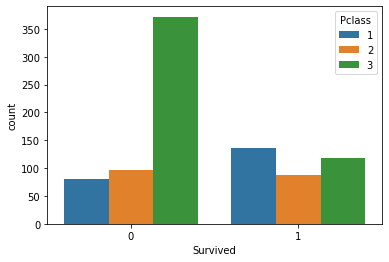

In [25]:
sns.countplot(x='Survived', hue='Pclass', data = df)
plt.show()

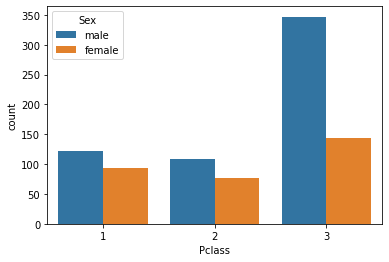

In [27]:
sns.countplot(x='Pclass', hue='Sex', data = df)
plt.show()

In [29]:
#descartando datos que no son importates en el modelo
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [63]:
#eliminar columnas que no queremos
df = pd.read_csv('train.csv')
df = df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket', 'Age'], axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [64]:
#sexo homgre 1 y 0 mujer, puerto tambien 0,1,2 respectivamente
genders = {'male': 0, 'female': 1}
data = [df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [65]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [66]:
#veamos valores nulos de embarked
df['Embarked'].isnull().sum()

2

In [67]:
#pasamos los valores nulos al valor mas comun
common_value = 'S'
data = [df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [68]:
df['Embarked'].isnull().sum()

0

In [69]:
#pasamos los valores de Embarked a numeros 0,1,2
ports = {'S': 0, 'C': 1, 'Q': 2}
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [70]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,1,3,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,0,3,0,0,0,8.0500,0


In [ ]:
#vamos a agrupar las tarifas del pasaje 'Fare' en grupos

In [71]:
for dataset in data:
    dataset.loc[dataset['Fare'] <= 10, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 20), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [72]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,0,0
1,1,1,1,1,0,3,1
2,1,3,1,0,0,0,0
3,1,1,1,1,0,3,0
4,0,3,0,0,0,0,0


In [73]:
x_data = df.drop('Survived', axis = 1)
y_survived = df['Survived']

In [74]:
x_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_survived, test_size = 0.3, random_state=42)

In [79]:
#creando el modelo 
from sklearn.linear_model import LogisticRegression

In [80]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [81]:
y_predict = logmodel.predict(x_test)

In [82]:
#Matriz de confusion para valorar el modelo, la matriz cruza los valores predichos con los actuales
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[131,  26],
       [ 32,  79]], dtype=int64)

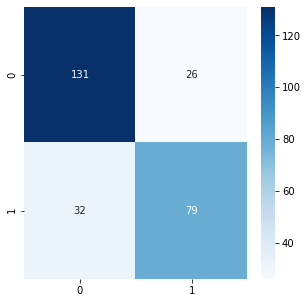

In [83]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap= 'Blues')
plt.show()

In [84]:
#Ahora otro tipo de metricas para verificar que tan bueno es nuestro modelo 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.71      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



In [85]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,0,0
1,1,1,1,1,0,3,1
2,1,3,1,0,0,0,0
3,1,1,1,1,0,3,0
4,0,3,0,0,0,0,0


In [86]:
#Vamos a salvar el df que tiene los datos limpios
df.to_csv('titanic_clean.csv', header=True)